# Interpolation of ECT's with Inverse Radon Transforms

We consider a toy dataset that consists of two points that we interpolate between. 


In [38]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from pytranskit.optrans.continuous.cdt import CDT
import numpy as np
from layers.ect import EctLayer, EctConfig
from datasets.pointclouds import PointCloudDataModule, PointCloudDataModuleConfig 


# Example with two points

In [39]:
NUM_PTS = 2
DEVICE = 'cuda:0'
NUM_THETAS = 64

dataset = PointCloudDataModule(PointCloudDataModuleConfig(num_points=NUM_PTS,batch_size=128))
for batch in dataset.train_dataloader():
    break


In [40]:
V = torch.vstack(
    [
        torch.sin(torch.linspace(0, 2 * torch.pi, NUM_THETAS,device=DEVICE)),
        torch.cos(torch.linspace(0, 2 * torch.pi, NUM_THETAS,device=DEVICE)),
        # torch.zeros_like(torch.linspace(0, 2 * torch.pi, NUM_THETAS,device=DEVICE))
    ]
)

CONFIG = EctConfig(device=DEVICE,bump_steps=NUM_THETAS,num_thetas=NUM_THETAS,normalized=True)
ectlayer = EctLayer(config = CONFIG,V=V)
derlayer = EctLayer(config = EctConfig(num_thetas=NUM_THETAS,bump_steps=NUM_THETAS,device=DEVICE,ect_type="points_derivative"),V=V)


In [41]:
for batch in dataset.train_dataloader(): 
    break

batch_ect = ectlayer(batch.to(DEVICE))
batch_ect_der = derlayer(batch.to(DEVICE))

(-0.5, 63.5, 63.5, -0.5)

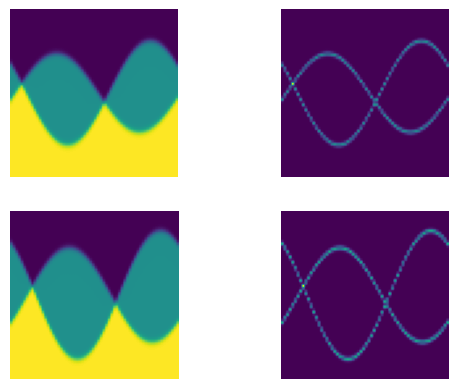

In [42]:
fig,axes = plt.subplots(2,2)

axes[0,0].imshow(batch_ect[0].cpu().squeeze().numpy())
axes[0,0].axis("off")
axes[1,0].imshow(batch_ect[1].cpu().squeeze().numpy())
axes[1,0].axis("off")

axes[0,1].imshow(batch_ect_der[0].cpu().squeeze().numpy())
axes[0,1].axis("off")
axes[1,1].imshow(batch_ect_der[1].cpu().squeeze().numpy())
axes[1,1].axis("off")



In [43]:
def cdt_interp(ect_start, ect_end):
    N=NUM_THETAS
    x0 = np.linspace(0, 1, N)
    I0= np.ones(x0.size)
    x=np.linspace(0, 2, N)
    num_thetas = NUM_THETAS
    ect = np.zeros((num_thetas,num_thetas))
    I1 = abs(ect_start) + 1e-7
    I2 = abs(ect_end) + 1e-7

    I1 = I1/I1.sum(axis=0)
    I2 = I2/I2.sum(axis=0)
    
    taus = np.linspace(0,1,100)
    cdt1 = CDT()
    inter = []

    for tau in taus: 
        for idx in range(num_thetas):
            # Compute the forward transform
            I1_hat, I1_hat_old, xtilde = cdt1.forward(x0, I0, x, I1[:,idx], rm_edge=False)
            I2_hat, I2_hat_old, xtilde = cdt1.forward(x0, I0, x, I2[:,idx], rm_edge=False)


            I_hat = ( tau ) * I1_hat + ( 1 - tau ) * I2_hat  
            I_recon = cdt1.inverse(I_hat, I0, x)

            ect[:,idx] = I_recon
            
        inter.append(ect)
        ect = np.zeros((num_thetas,num_thetas))
    return np.stack(inter)


def linear_interp(ect_start,ect_end):
    lin = torch.linspace(0,1,100).view(-1,1,1)
    interp_linear = lin * ect_start_linear.unsqueeze(0) + (1-lin) * ect_end_linear.unsqueeze(0)
    return interp_linear











# interp_ect = torch.tensor(ect_interp(ect_start_der.numpy(),ect_end_der.numpy()),dtype=torch.float32,device=DEVICE).cumsum(dim=1)
# 


# ect_start = batch_ect_der[0]
# ect_end = batch_ect_der[1]

# ect_batch_der = derlayer(ect_start)
# ect_batch_linear = ectlayer(test_batch)

# ect_start_der = ect_batch_der[0].cpu().squeeze().detach()
# ect_end_der = ect_batch_der[25].cpu().squeeze().detach() 

# ect_start_linear = ect_batch_linear[0].cpu().squeeze().detach()
# ect_end_linear = ect_batch_linear[25].cpu().squeeze().detach() 

NameError: name 'test_batch' is not defined

In [ ]:
criterion = nn.MSELoss()
criterion2 = nn.BCELoss()

optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)

# Point to training loop video
num_epochs = 500
outputs = []

for epoch in range(num_epochs):
    for batch in dataset.train_dataloader():
        batch = batch.to(DEVICE)
        h = model(batch)
        # print(h.shape)
        # batch_ect = ectlayer(batch) 
        # loss = criterion(recon, batch_ect) + chamfer_distance(
        #     F.pad(batch.x.view(-1,NUM_PTS,2),[0,1]),
        #     F.pad(_batch.x.view(-1,NUM_PTS,2),[0,1])
        # ).sum()criterion(_batch.h,batch.x@V) +
        loss =  criterion(h,batch.x@V) 
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch:{epoch+1}, Loss:{loss.item():.6f}')
    # outputs.append((epoch, batch, recon, _batch))

Epoch:1, Loss:0.155345
Epoch:2, Loss:0.167997
Epoch:3, Loss:0.172371
Epoch:4, Loss:0.162655
Epoch:5, Loss:0.168042
Epoch:6, Loss:0.172891
Epoch:7, Loss:0.153209
Epoch:8, Loss:0.160543
Epoch:9, Loss:0.163010
Epoch:10, Loss:0.160432
Epoch:11, Loss:0.153289
Epoch:12, Loss:0.174126
Epoch:13, Loss:0.167764
Epoch:14, Loss:0.169645
Epoch:15, Loss:0.171056
Epoch:16, Loss:0.158929
Epoch:17, Loss:0.162930
Epoch:18, Loss:0.168594
Epoch:19, Loss:0.167673
Epoch:20, Loss:0.146582
Epoch:21, Loss:0.153509
Epoch:22, Loss:0.143359
Epoch:23, Loss:0.156801
Epoch:24, Loss:0.152835
Epoch:25, Loss:0.165561
Epoch:26, Loss:0.155222
Epoch:27, Loss:0.150126
Epoch:28, Loss:0.158199
Epoch:29, Loss:0.169507
Epoch:30, Loss:0.154068
Epoch:31, Loss:0.170922
Epoch:32, Loss:0.167276
Epoch:33, Loss:0.171361
Epoch:34, Loss:0.169670
Epoch:35, Loss:0.170179
Epoch:36, Loss:0.158297
Epoch:37, Loss:0.159221
Epoch:38, Loss:0.175947
Epoch:39, Loss:0.165230
Epoch:40, Loss:0.165968
Epoch:41, Loss:0.169084
Epoch:42, Loss:0.160783
E

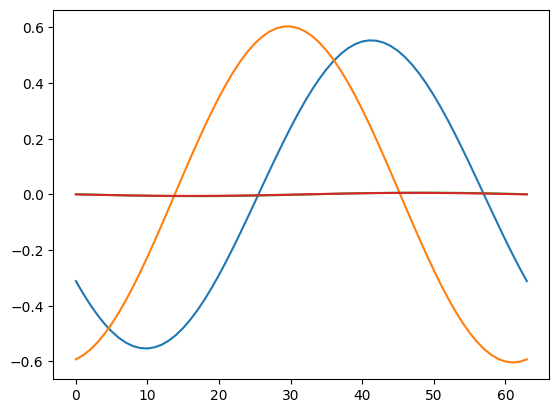

In [ ]:
h_true = batch.x@V

plt.plot(h_true[0].detach().cpu().numpy())
plt.plot(h_true[1].detach().cpu().numpy())


plt.plot(h[1].detach().cpu().numpy())
plt.plot(h[0].detach().cpu().numpy())

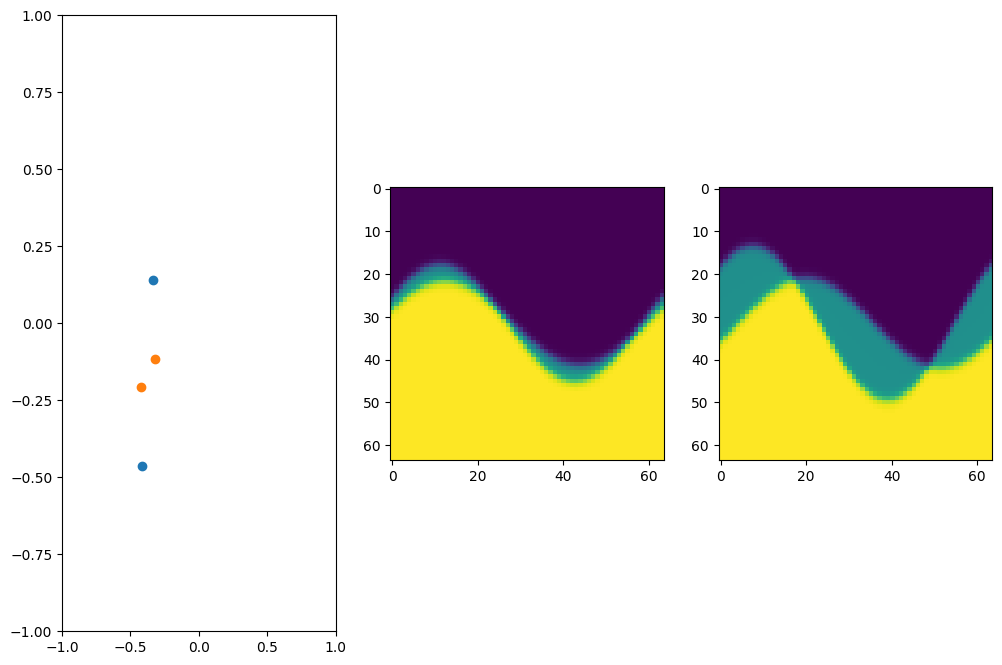

In [ ]:
for test_batch in dataset.test_dataloader():
    break

recon_batch, internal_batch = model(test_batch.to(DEVICE))



indices = [0]


fig, axes = plt.subplots(len(indices),3,figsize=(12,8))

for idx,batch_idx in enumerate(indices):
    pred = internal_batch.x[NUM_PTS*batch_idx:NUM_PTS*batch_idx+NUM_PTS].cpu().detach().numpy()
    points = test_batch[batch_idx].x.cpu().detach().numpy()

    ax = axes[0]
    # ax.axis("off")
    ax.scatter(points[:,0],points[:,1])
    ax.scatter(pred[:,0],pred[:,1])
    ax.set_xlim([-1,1])
    ax.set_ylim([-1,1])

    ax = axes[1]
    # ax.axis("off")
    ax.imshow(recon_batch[batch_idx].cpu().squeeze().detach().numpy())

    ax = axes[2]
    # ax.axis("off")
    ax.imshow(internal_batch.ect[batch_idx].cpu().squeeze().detach().numpy())


In [ ]:

def ect_interp(ect_start, ect_end):
    N=NUM_THETAS
    x0 = np.linspace(0, 1, N)
    I0= np.ones(x0.size)
    x=np.linspace(0, 2, N)
    num_thetas = NUM_THETAS
    ect = np.zeros((num_thetas,num_thetas))
    I1 = abs(ect_start) + 1e-7
    I2 = abs(ect_end) + 1e-7

    I1 = I1/I1.sum(axis=0)
    I2 = I2/I2.sum(axis=0)
    
    taus = np.linspace(0,1,100)
    cdt1 = CDT()
    inter = []

    for tau in taus: 
        for idx in range(num_thetas):
            # Compute the forward transform
            I1_hat, I1_hat_old, xtilde = cdt1.forward(x0, I0, x, I1[:,idx], rm_edge=False)
            I2_hat, I2_hat_old, xtilde = cdt1.forward(x0, I0, x, I2[:,idx], rm_edge=False)


            I_hat = ( tau ) * I1_hat + ( 1 - tau ) * I2_hat  
            I_recon = cdt1.inverse(I_hat, I0, x)

            ect[:,idx] = I_recon
            
        inter.append(ect)
        ect = np.zeros((num_thetas,num_thetas))
    return np.stack(inter)

In [ ]:

derlayer = EctLayer(config = EctConfig(num_thetas=NUM_THETAS,bump_steps=NUM_THETAS,device=DEVICE,ect_type="points_derivative"))
derlayer.v = V




# test_batch = Batch.from_data_list([Data(x=torch.tensor([[.4,0]],dtype=torch.float32)), Data(x=torch.tensor([[0,0.4]],dtype=torch.float32))]).to(DEVICE)

ect_batch_der = derlayer(test_batch)
ect_batch_linear = ectlayer(test_batch)

ect_start_der = ect_batch_der[0].cpu().squeeze().detach()
ect_end_der = ect_batch_der[25].cpu().squeeze().detach() 

ect_start_linear = ect_batch_linear[0].cpu().squeeze().detach()
ect_end_linear = ect_batch_linear[25].cpu().squeeze().detach() 


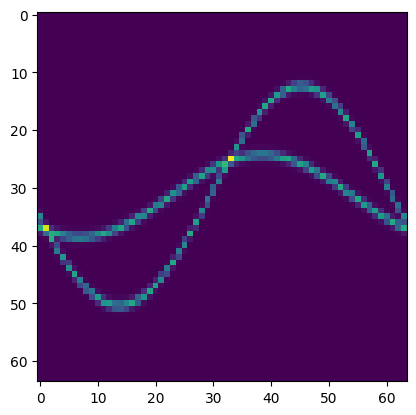

In [ ]:
plt.imshow(ect_batch_der[0].squeeze().cpu().numpy())

In [ ]:
interp_ect = torch.tensor(ect_interp(ect_start_der.numpy(),ect_end_der.numpy()),dtype=torch.float32,device=DEVICE).cumsum(dim=1)
lin = torch.linspace(0,1,100).view(-1,1,1)
interp_linear = lin * ect_start_linear.unsqueeze(0) + (1-lin) * ect_end_linear.unsqueeze(0)


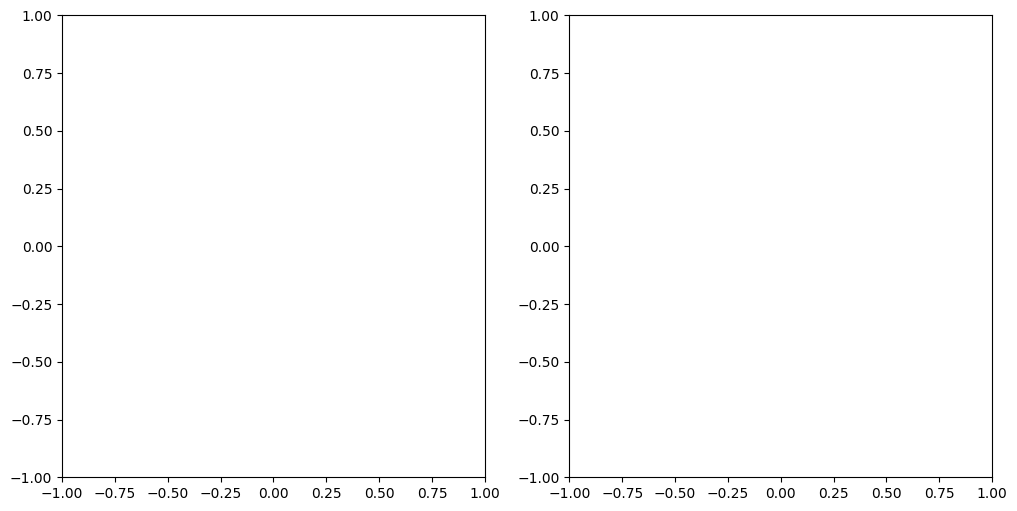

In [ ]:
# batch = Batch.from_data_list([Data(x=el.squeeze()) for el in interp])

fig,axes = plt.subplots(1,2,figsize=(12,6))

axes[0].set_xlim([-1,1])
axes[0].set_ylim([-1,1])


axes[1].set_xlim([-1,1])
axes[1].set_ylim([-1,1])


for idx in range(100):
    pts = model.encoder(interp_ect[idx].view(1,NUM_THETAS,NUM_THETAS)).view(-1,2).cpu().detach().numpy()
    axes[0].scatter(pts[:100,0],pts[:100,1])
    pts_linear = model.encoder(interp_linear[idx].view(1,NUM_THETAS,NUM_THETAS).cuda()).view(-1,2).cpu().detach().numpy()
    axes[1].scatter(pts_linear[:100,0],pts_linear[:100,1])

plt.show()


In [ ]:
# Pass batch through the encoder. 
pts_interp_ect = model.encoder(interp_ect.unsqueeze(1)).view(-1,2).detach().cpu().numpy()
pts_interp_linear = model.encoder(interp_linear.unsqueeze(1).cuda()).view(-1,2).detach().cpu().numpy()

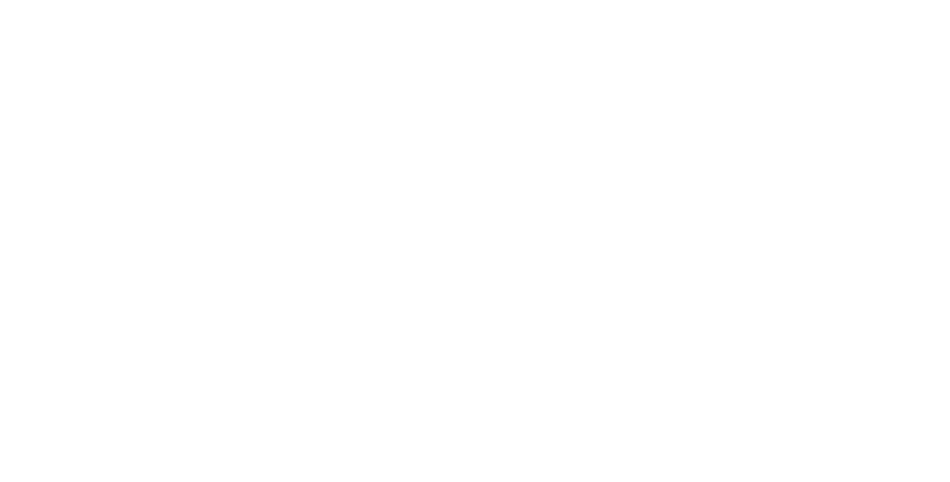

In [ ]:
pts = pts_interp_ect[:NUM_PTS]
pts_linear = pts_interp_linear[:NUM_PTS]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

ax0 = axes[0]
ax0.axis("off")
ax0.set_xlim([-3,3])
ax0.set_ylim([-3,3])
scat = ax0.scatter(pts[:,0],pts[:,1])

ax0 = axes[1]
ax0.axis("off")
ax0.set_xlim([-3,3])
ax0.set_ylim([-3,3])
scat2 = ax0.scatter(pts_linear[:,0],pts_linear[:,1])


def update(idx):
    pts = pts_interp_ect[NUM_PTS*idx:NUM_PTS*idx+NUM_PTS]
    pts_linear = pts_interp_linear[NUM_PTS*idx:NUM_PTS*idx+NUM_PTS]
    scat.set_offsets(pts)
    scat2.set_offsets(pts_linear)


ani = animation.FuncAnimation(fig=fig, func=update, frames=100, interval=30)

from IPython.display import HTML
HTML(ani.to_jshtml())
